In [17]:
import statistics
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [18]:
df = pd.read_csv('data.csv')

In [19]:
df.head()

,simt,id,type,lat,lon,alt,tas,cas,vs,gs,distflown,Temp,trk,hdg,p,rho,thrust,drag,phase,fuelflow
0,0.0,0,M600,4.665970,-74.055580,3.048,10.001463,10.0,0.0,10.001463,0.0,288.130188,103.682755,103.682755,101288.381045,1.224641,0.0,0.0,0.0,0.0
1,0.0,1,M600,4.665970,-74.055580,3.048,10.001463,10.0,0.0,10.001463,0.0,288.130188,76.194480,76.194480,101288.381045,1.224641,0.0,0.0,0.0,0.0
2,0.0,7,M600,4.665970,-74.055580,3.048,10.001463,10.0,0.0,10.001463,0.0,288.130188,159.892422,159.892422,101288.381045,1.224641,0.0,0.0,0.0,0.0
3,0.0,9,M600,4.722692,-74.062403,3.048,10.001463,10.0,0.0,10.001463,0.0,288.130188,3.128205,3.128205,101288.381045,1.224641,0.0,0.0,0.0,0.0
4,0.0,12,M600,4.722692,-74.062403,3.048,10.001463,10.0,0.0,10.001463,0.0,288.130188,340.849025,340.849025,101288.381045,1.224641,0.0,0.0,0.0,0.0


In [20]:
df.dtypes

simt         float64
id             int64
type          object
lat          float64
lon          float64
alt          float64
tas          float64
cas          float64
vs           float64
gs           float64
distflown    float64
Temp         float64
trk          float64
hdg          float64
p            float64
rho          float64
thrust       float64
drag         float64
phase        float64
fuelflow     float64
dtype: object

In [21]:
df.isnull().sum()

simt         0
id           0
type         0
lat          0
lon          0
alt          0
tas          0
cas          0
vs           0
gs           0
distflown    0
Temp         0
trk          0
hdg          0
p            0
rho          0
thrust       0
drag         0
phase        0
fuelflow     0
dtype: int64

In [22]:
df.sort_values(by=['id', 'simt'], ascending=True)

,simt,id,type,lat,lon,alt,tas,cas,vs,gs,distflown,Temp,trk,hdg,p,rho,thrust,drag,phase,fuelflow
0,0.0,0,M600,4.665970,-74.055580,3.04800,10.001463,10.0,0.000,10.001463,0.000000,288.130188,103.682755,103.682755,101288.381045,1.224641,0.0,0.0,0.0,0.0
6911,1.0,0,M600,4.665932,-74.055499,3.84810,10.001811,10.0,1.524,10.001811,10.001585,288.125483,120.526604,120.526604,101279.685974,1.224556,0.0,0.0,0.0,0.0
13822,2.0,0,M600,4.665886,-74.055421,6.17220,10.002890,10.0,3.048,10.002890,20.003901,288.110871,120.346998,120.346998,101252.689343,1.224292,0.0,0.0,0.0,0.0
20733,3.0,0,M600,4.665841,-74.055343,10.66661,10.005002,10.0,5.000,10.005002,30.007803,288.082292,120.162752,120.162752,101199.901769,1.223775,0.0,0.0,0.0,0.0
27642,4.0,0,M600,4.665798,-74.055265,15.66661,10.007404,10.0,5.000,8.668752,39.947134,288.049792,90.000575,119.976104,101139.899451,1.223188,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919115,178.0,19933,M600,4.631121,-74.071278,22.36139,10.010862,10.0,-5.000,8.471201,1514.671738,288.003026,92.338223,122.274839,101053.609310,1.222342,0.0,0.0,0.0,0.0
922289,179.0,19933,M600,4.631118,-74.071202,17.36139,10.008459,10.0,-5.000,8.468423,1523.141481,288.035526,92.338272,122.282810,101113.570173,1.222930,0.0,0.0,0.0,0.0
925436,180.0,19933,M600,4.631091,-74.071125,12.36139,10.006056,10.0,-5.000,10.006056,1532.455620,288.068026,120.271029,120.271029,101173.559843,1.223517,0.0,0.0,0.0,0.0
928564,181.0,19933,M600,4.631049,-74.071045,7.36139,10.003654,10.0,-5.000,10.003654,1542.460415,288.100526,115.673554,115.673554,101233.578330,1.224105,0.0,0.0,0.0,0.0


In [23]:
df = df.sort_values(by=['id', 'simt'], ascending=False).drop_duplicates('id').sort_index()
df

,simt,id,type,lat,lon,alt,tas,cas,vs,gs,distflown,Temp,trk,hdg,p,rho,thrust,drag,phase,fuelflow
16606,2.0,8023,M600,4.684728,-74.052626,1.09728,10.000585,10.0,-2.4384,10.000585,20.002480,288.142075,53.708909,53.708909,101310.350232,1.224857,0.0,0.0,0.0,0.0
16806,2.0,8554,M600,4.652183,-74.056401,1.89738,10.000958,10.0,-1.9812,10.000958,20.002807,288.137023,347.284910,347.284910,101301.012856,1.224765,0.0,0.0,0.0,0.0
23676,3.0,8450,M600,4.762730,-74.045631,2.81178,10.001397,10.0,-1.9812,10.001397,30.005259,288.131080,175.816143,175.816143,101290.028600,1.224658,0.0,0.0,0.0,0.0
26407,3.0,16396,M600,4.632235,-74.063602,2.47650,10.001240,10.0,-2.1336,10.001240,30.005086,288.133209,161.068916,161.068916,101293.964514,1.224696,0.0,0.0,0.0,0.0
35477,5.0,2673,M600,4.629868,-74.067097,1.00495,10.000602,10.0,-5.0000,10.000602,50.010205,288.141843,317.919254,317.919254,101309.920734,1.224852,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226366,511.0,16700,M600,4.703794,-74.015390,3.86139,10.001974,10.0,-5.0000,10.001974,4393.212310,288.123276,110.509910,110.509910,101275.608423,1.224516,0.0,0.0,0.0,0.0
1226381,515.0,9722,M600,4.706493,-74.014295,3.11139,10.001614,10.0,-5.0000,10.001614,4550.213116,288.128151,106.414406,106.414406,101284.616710,1.224605,0.0,0.0,0.0,0.0
1226398,520.0,17435,M600,4.646516,-74.056494,2.36139,10.001254,10.0,-5.0000,10.001254,4311.942370,288.133026,112.944528,112.944528,101293.625646,1.224693,0.0,0.0,0.0,0.0
1226475,559.0,4569,M600,4.702269,-74.014572,3.36139,10.001734,10.0,-5.0000,10.001734,4736.152664,288.126526,111.577904,111.577904,101281.613876,1.224575,0.0,0.0,0.0,0.0


In [24]:
df = df.drop(columns=['type', 'lat', 'lon', 'alt', 'tas', 'cas', 'vs', 'gs', 'Temp', 'trk', 'hdg', 'p', 'rho', 'thrust', 'drag', 'phase', 'fuelflow'])
df

,simt,id,distflown
16606,2.0,8023,20.002480
16806,2.0,8554,20.002807
23676,3.0,8450,30.005259
26407,3.0,16396,30.005086
35477,5.0,2673,50.010205
...,...,...,...
1226366,511.0,16700,4393.212310
1226381,515.0,9722,4550.213116
1226398,520.0,17435,4311.942370
1226475,559.0,4569,4736.152664


Used to check that we have all Ids accounted for

In [25]:
df.nunique()

simt          463
id           6911
distflown    6908
dtype: int64

In [26]:
id_list = df.id.unique()
len(id_list)

6911

In [27]:
id_count = df['id'].value_counts(sort=False).tolist()
len(id_count)

6911

In [28]:
df['avg_speed'] = df['distflown'] / df['simt']

In [29]:
df

,simt,id,distflown,avg_speed
16606,2.0,8023,20.002480,10.001240
16806,2.0,8554,20.002807,10.001403
23676,3.0,8450,30.005259,10.001753
26407,3.0,16396,30.005086,10.001695
35477,5.0,2673,50.010205,10.002041
...,...,...,...,...
1226366,511.0,16700,4393.212310,8.597284
1226381,515.0,9722,4550.213116,8.835365
1226398,520.0,17435,4311.942370,8.292197
1226475,559.0,4569,4736.152664,8.472545


<Axes: xlabel='distflown', ylabel='avg_speed'>

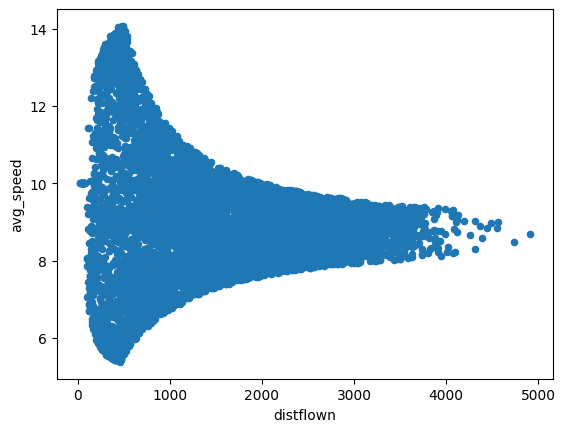

In [30]:
df.plot('distflown','avg_speed', kind='scatter')

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(trainX,trainY,test_size=0.2, random_state=0)

In [32]:
clf = svm.SVR()
clf1 = RandomForestClassifier()
clf2 = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [33]:
y_train_pred = clf.predict(X_test)
y_train_pred1 = clf1.predict(X_test)
y_train_pred2 = clf2.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
clf.score(X_test, y_train_pred)
clf1.score(X_test, y_train_pred1)
clf2.score(X_test, y_train_pred2)

: 

In [ ]:
y_pred = clf.predict(testX)
y_pred1 = clf1.predict(testX)
y_pred2 = clf2.predict(testX)

: 

In [ ]:
clf.score(testX, y_pred)
clf1.score(testX, y_pred1)
clf2.score(testX, y_pred2)

: 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

: 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf1]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

: 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

: 